In [1]:
#Let's load the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os,sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append('/content/drive/MyDrive/colab Notebooks')

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import shap

In [ ]:
#loading the dataset
train = pd.read_csv('drive/MyDrive/Colab Notebooks/Kaggle_competition_may/train.csv')
test = pd.read_csv('drive/MyDrive/Colab Notebooks/Kaggle_competition_may/test.csv')

# EDA (explanatory data analysis)

In [ ]:
train.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [ ]:
train.shape

(900000, 33)

In [ ]:
# Let's see some info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [ ]:
#Some quick statistics
train.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [ ]:
#Let's look for NAN values in our dataframe 
train.isnull().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

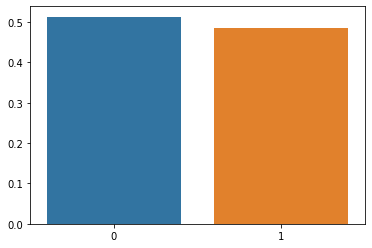

In [ ]:
# Let's see distribution of the target variable
x_hist = train["target"].value_counts().index
y_hist = train["target"].value_counts().values/len(train["target"])
sns.barplot(x=x_hist,y=y_hist)

So, the train dataset seems balanced and missing values are not present. We could divide our analysis into three/four parts: 

1) Looking at float and int distributions

2) Trying to decode the only object string type feature

3) Looking for correlations/interactions for features

After that, we'll focus on feature engineering and feature selection phases. 

In [ ]:
# Let's start with float ones
float_features = [f for f in train.columns if train[f].dtypes=='float64']

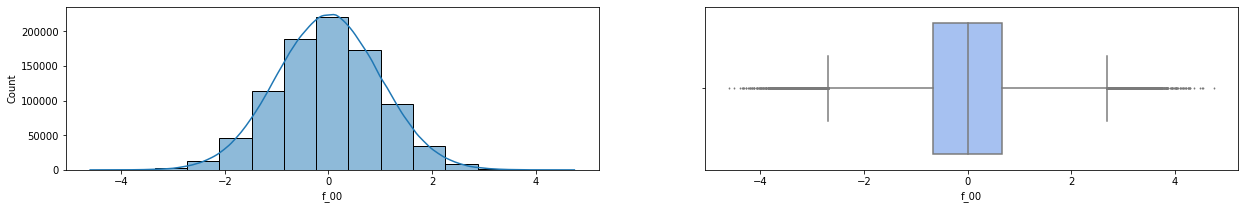

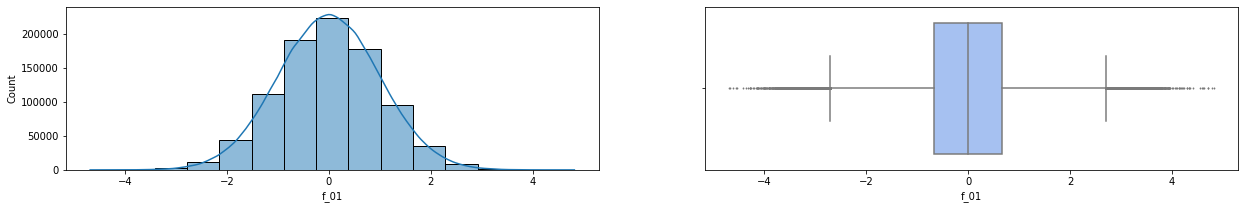

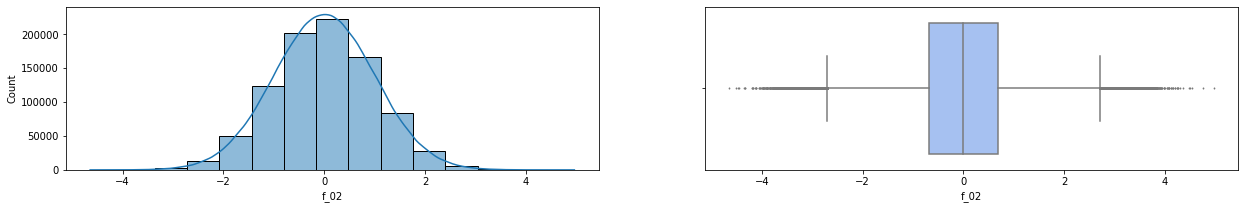

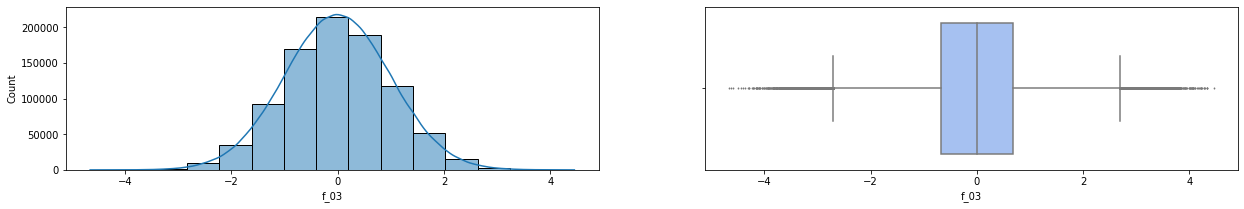

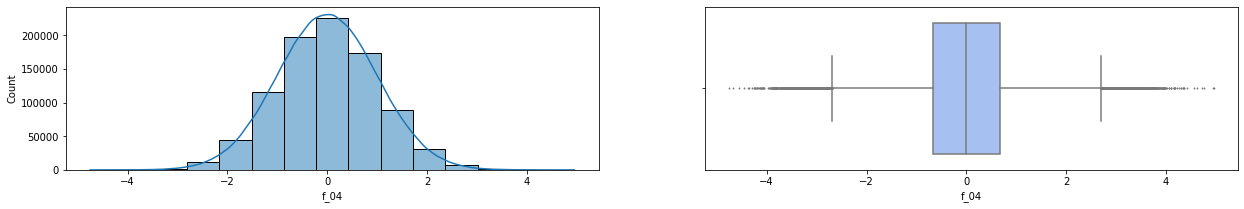

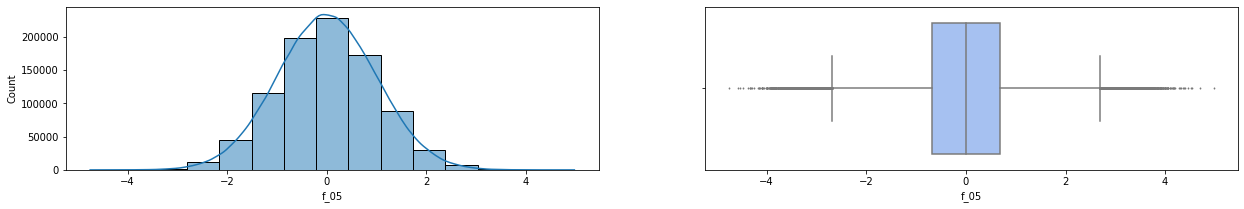

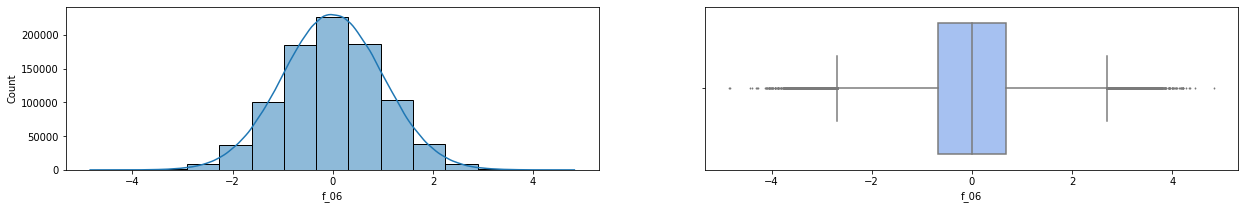

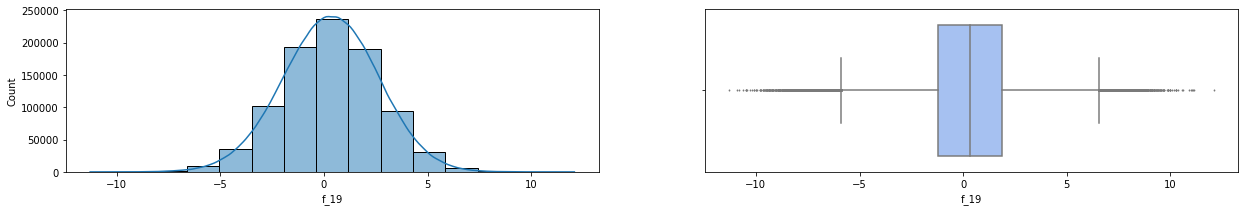

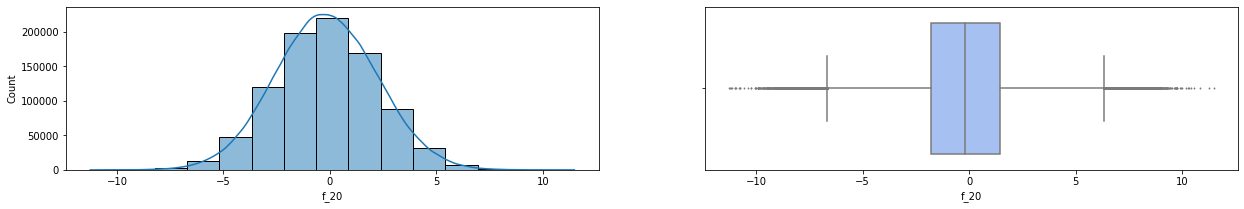

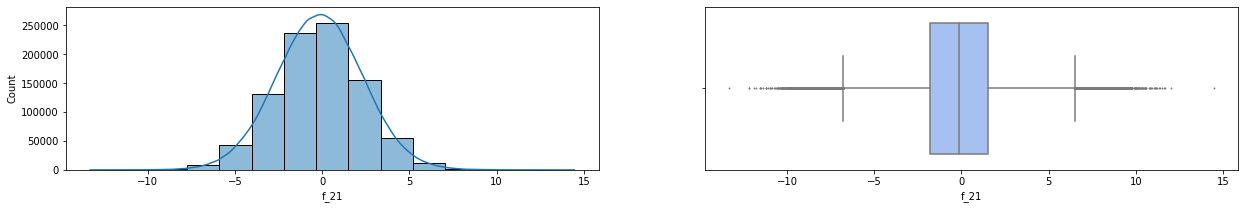

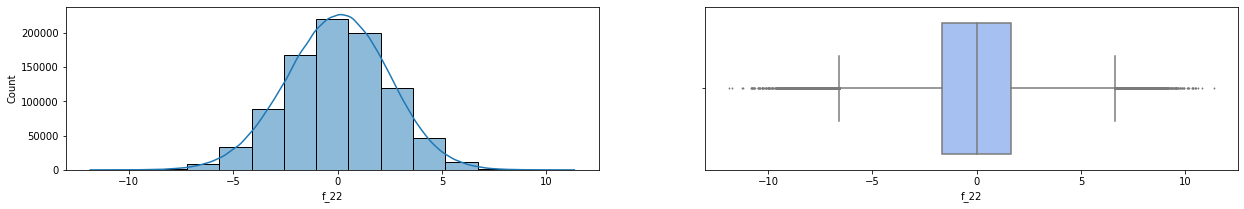

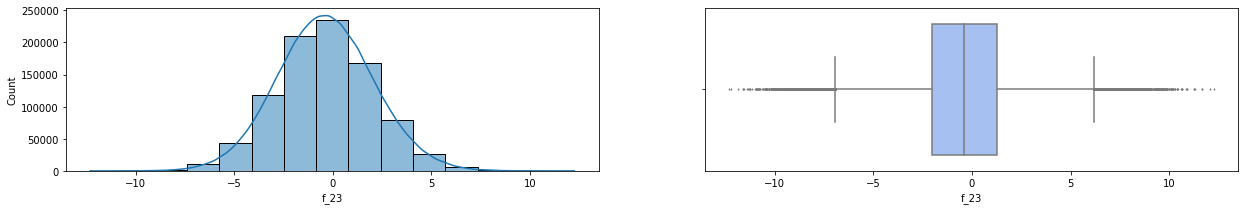

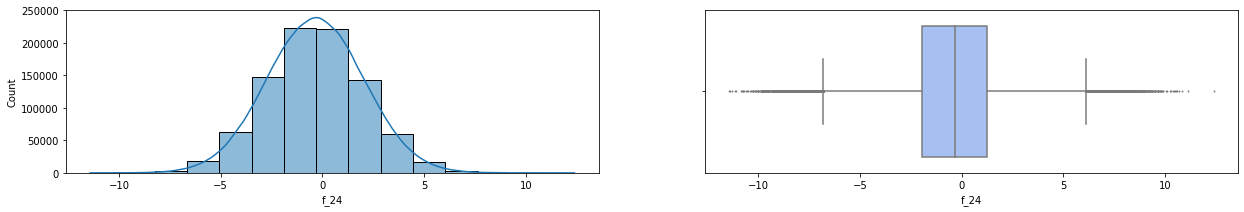

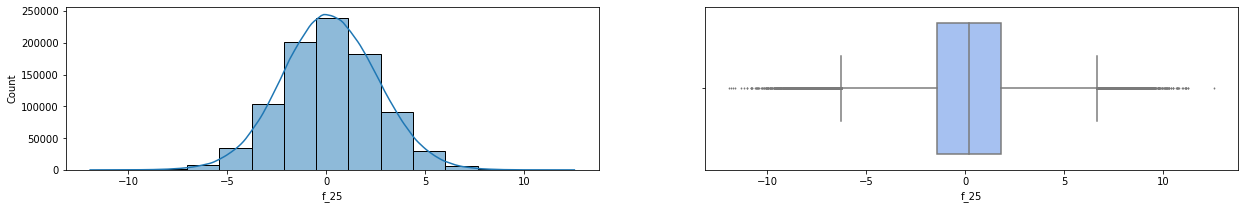

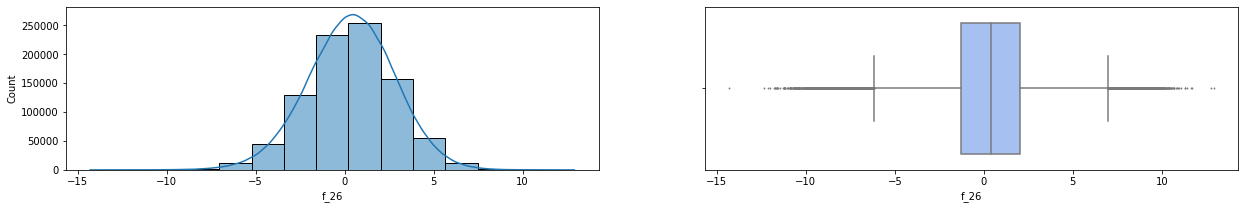

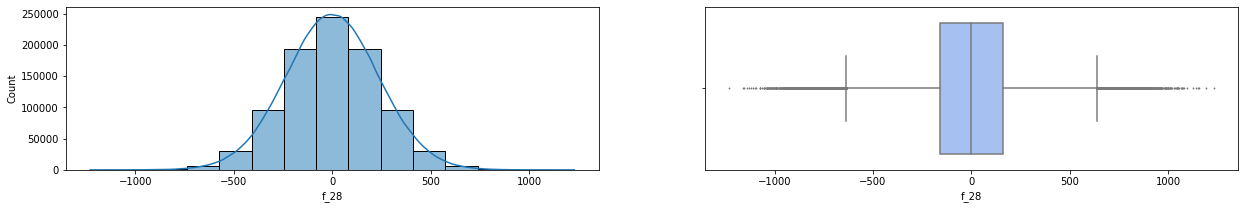

In [ ]:
# Now let's look for histograms and boxplots
for f in float_features:
    fig, axs = plt.subplots(1,2,figsize=(21,3));
    sns.histplot(data = train, x = f,bins=15, kde=True, ax=axs[0]);
    sns.boxplot(data= train, x=f, ax = axs[1], color='#99befd', fliersize=1);

As we can see, features are normally distributed. Let's check int64 features

In [ ]:
int_features = [f for f in train.columns if train[f].dtypes=="int64"]

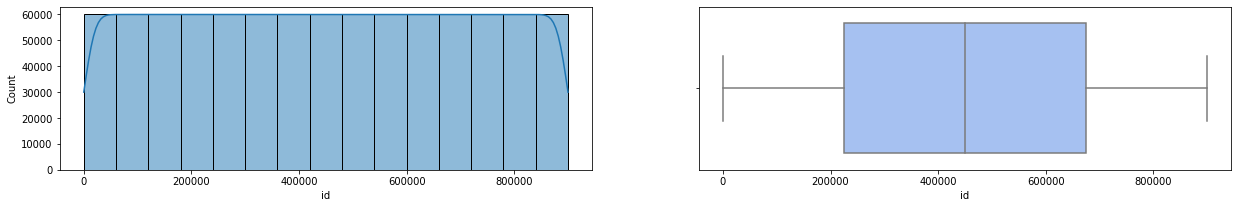

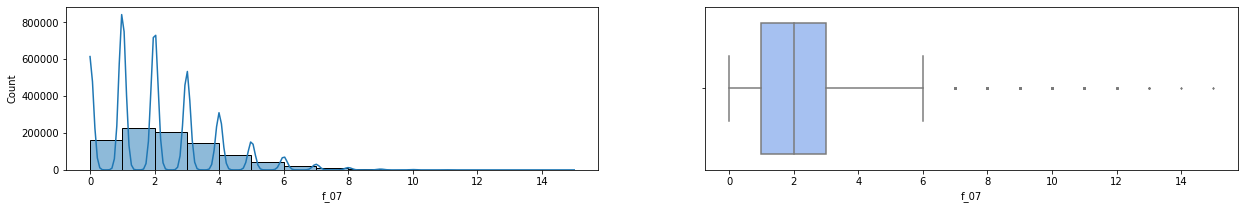

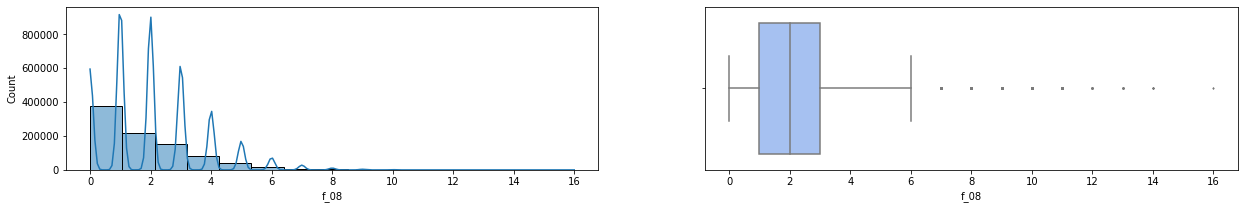

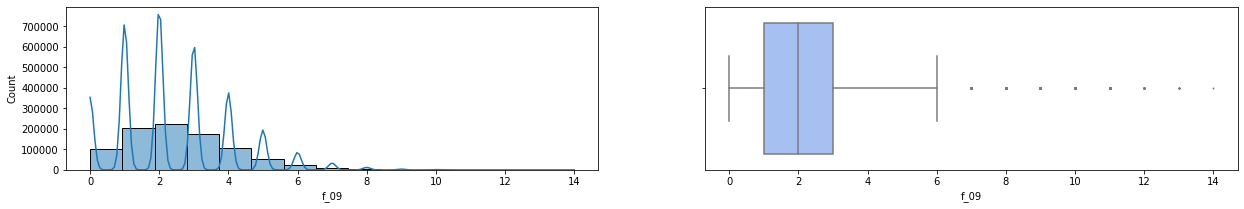

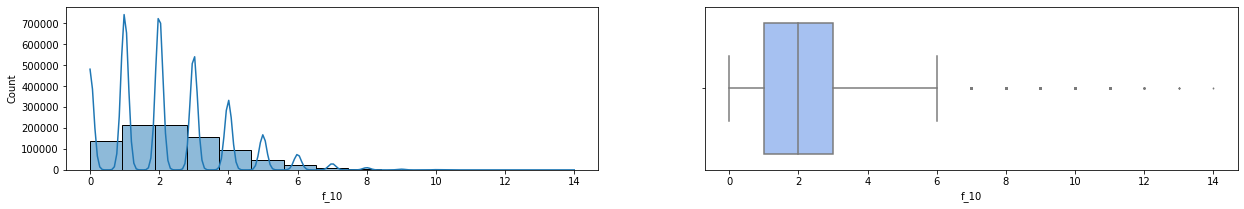

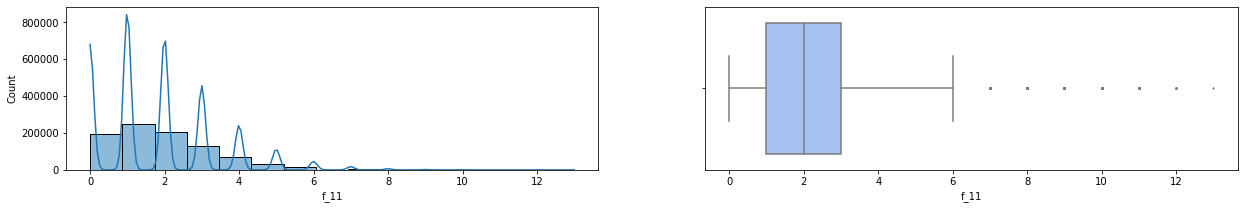

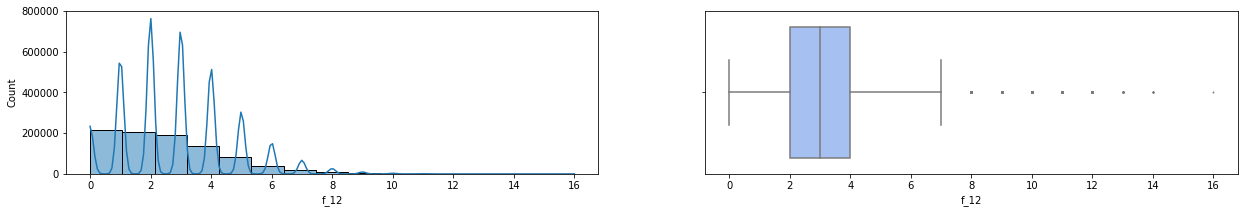

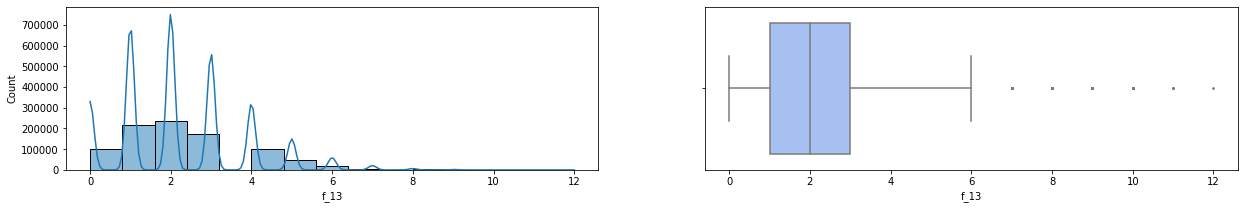

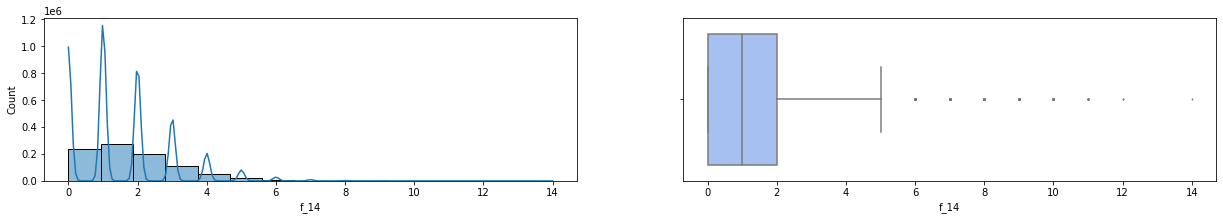

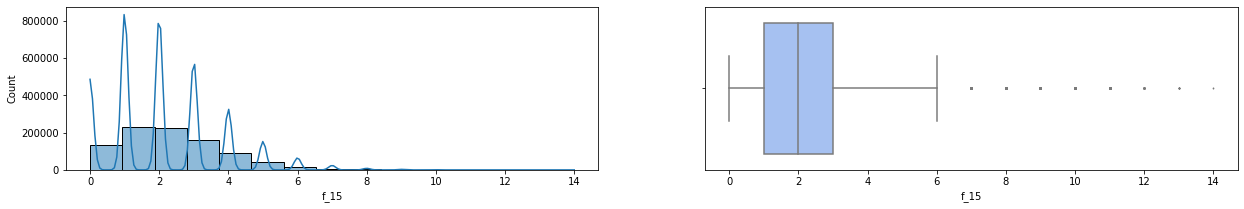

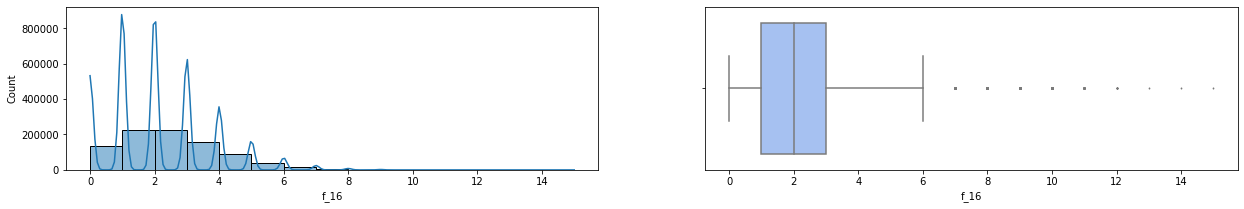

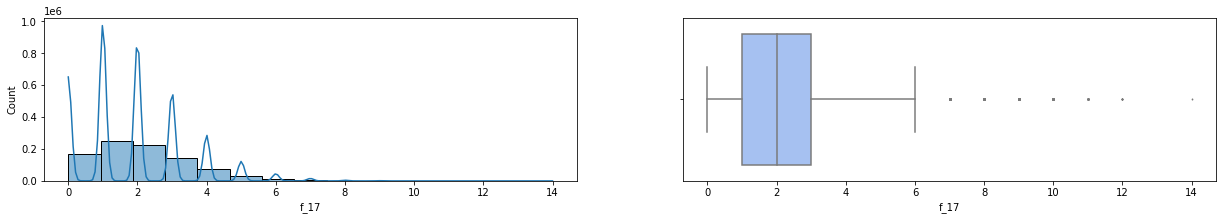

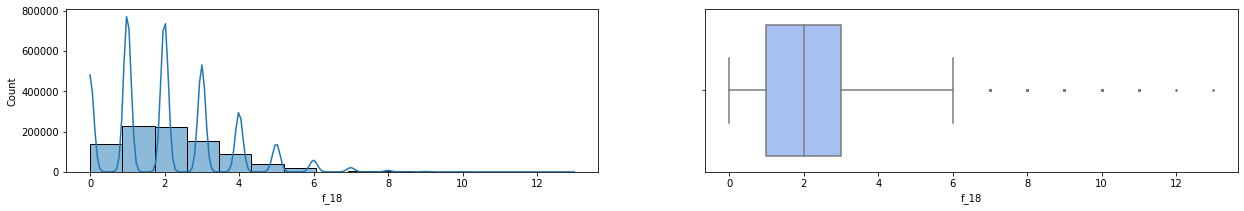

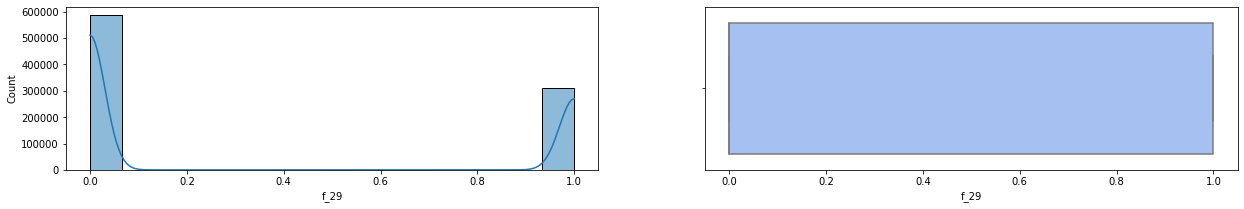

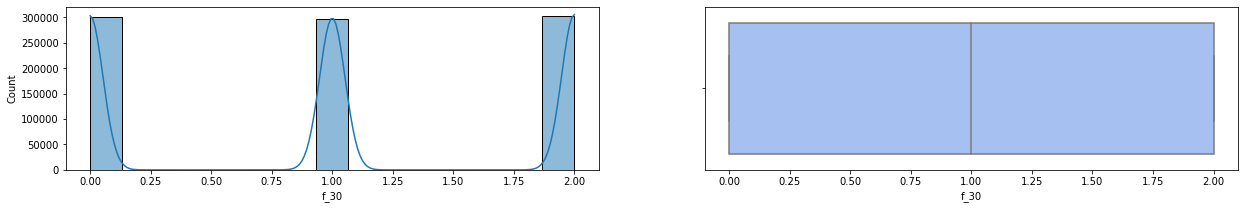

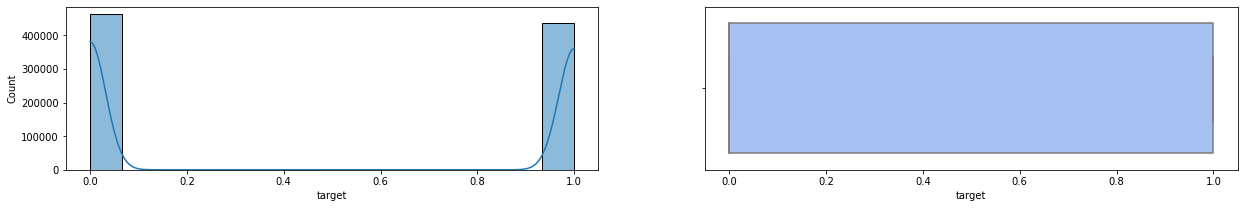

In [ ]:
for f in int_features:
    fig,axs = plt.subplots(1,2,figsize=(21,3))
    sns.histplot(data = train, x = f,bins=15, kde=True, ax=axs[0]);
    sns.boxplot(data = train, x = f, ax = axs[1], color='#99befd', fliersize=1);

We can see how int variables follow oscillating patterns. Last two variables except the target one are particular. First one is binary, last one is ternary.

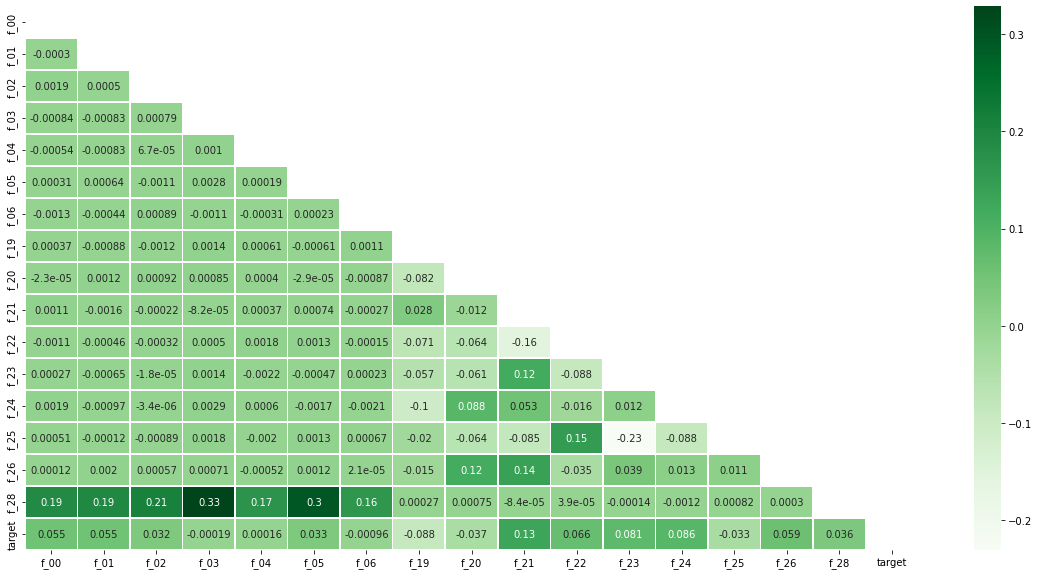

In [ ]:
# Let's look for correlation between variables 
# Checking for the correlation between eachother by using heatmap
float_variables = pd.concat([train.loc[:,float_features],train[["target"]]],axis=1)
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(float_variables.corr(), dtype = bool))
sns.heatmap(float_variables.corr(), annot=True, cmap="Greens", mask=mask, linewidth=0.5)


Float features don't seem to be much correlated. Let's look for int features 

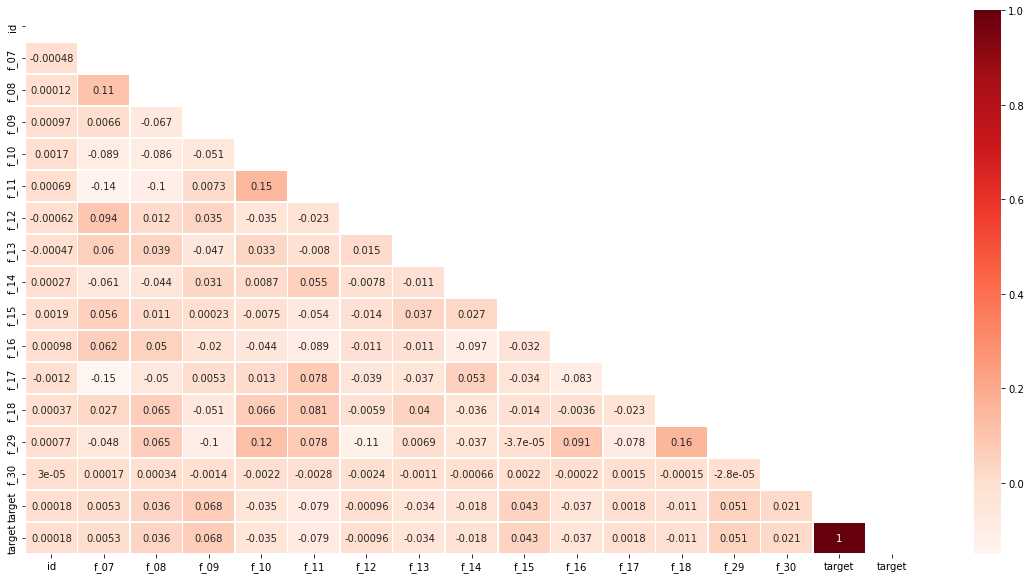

In [ ]:
# Let's look for correlation between variables 
# Checking for the correlation between eachother by using heatmap
int_variables = pd.concat([train.loc[:,int_features],train[["target"]]],axis=1)
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(int_variables.corr(), dtype = bool))
sns.heatmap(int_variables.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

Same goes for int variables

## Feature engineering sting F_27 feature

In [ ]:
# Let's look for unique values
train["f_27"].unique()
print(len(train["f_27"].unique()))

741354


Out of 900000 samples, unique values are 741354. Let's look for max size of strings, and representance of letters

In [ ]:
train.f_27.str.len().min(), train.f_27.str.len().max(), test.f_27.str.len().min(), test.f_27.str.len().max()

(10, 10, 10, 10)

In [ ]:
train.f_27.value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

In [ ]:
pd.concat([train, test]).f_27.value_counts()

BAAACABLBB    15
ACBBAABCBC    15
BAAACABNBC    15
BCBBBBCDCC    14
BBBBBBCJBC    13
              ..
ABBAAAECEB     1
ACBCBAEOAE     1
BBBCBBCACG     1
BBACDAANGA     1
AAAJCBGQBA     1
Name: f_27, Length: 1181880, dtype: int64

Train and test do not have same unique lenghts of strings. This means that even if we would assign some ordinal target guided encoding, we would get errors for the dataset (1181880 - 741354 = 440526). 

In [ ]:
for i in range(10):
    print(f'Position {i}')
    tg = train.groupby(train.f_27.str.get(i))
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     

Interesting fact is that the rarest is the letter, the higher is the probability of the machine working. We could explode positions and code letters based on the Unicode system. Then, we could add a column which refers to the unique letters for that position. Less repeted is the  letter for that position, the higher the rank

In [ ]:
ranking_strings = [len(set(s)) for s in train.f_27]

In [ ]:
temp_df = pd.DataFrame({"f_27" : train.f_27.values, "len_unique_values" : ranking_strings,
                        "target" : train.target.values})

In [ ]:
temp_df

,f_27,len_unique_values,target
0,ABABDADBAB,3,0
1,ACACCADCEB,5,1
2,AAAEABCKAD,6,1
3,BDBBAACBCB,4,1
4,BDBCBBCHFE,6,1
...,...,...,...
899995,BABBCBBBED,5,1
899996,BBBGBBDQBE,5,0
899997,AEBEDBBHBA,5,0
899998,ADBAAADDAE,4,0


In [ ]:
temp_df.len_unique_values.unique() 

array([3, 5, 6, 4, 7, 2, 8, 9, 1])

In [ ]:
temp_df.groupby("len_unique_values")["target"].mean()

len_unique_values
1    0.000000
2    0.091575
3    0.085344
4    0.481974
5    0.489319
6    0.479016
7    0.910944
8    0.906329
9    1.000000
Name: target, dtype: float64

We can see how less repeted letters correspond to a major probability of the machine working

Let's explode this column in ten columns (one for position) and encode letters as unicode values

In [ ]:
for letter in range(10):
  train["position"+ "_" + str(letter)] = train["f_27"].str.get(letter)


In [ ]:
for p in range(10):
  train["position" + "_" + str(p)] = train["position" + "_" + str(p)].apply(lambda x: ord(x)-ord("A"))

In [ ]:
train.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,position_0,position_1,position_2,position_3,position_4,position_5,position_6,position_7,position_8,position_9
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,0,1,0,1,3,0,3,1,0,1
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,0,2,0,2,2,0,3,2,4,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,0,0,0,4,0,1,2,10,0,3
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,1,3,1,1,0,0,2,1,2,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,1,3,1,2,1,1,2,7,5,4


In [ ]:
train["len_unique_values"] = [len(set(s)) for s in train.f_27]

In [ ]:
train.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,position_1,position_2,position_3,position_4,position_5,position_6,position_7,position_8,position_9,len_unique_values
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,1,0,1,3,0,3,1,0,1,3
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2,0,2,2,0,3,2,4,1,5
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,0,0,4,0,1,2,10,0,3,6
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,3,1,1,0,0,2,1,2,1,4
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,3,1,2,1,1,2,7,5,4,6


In [ ]:
cat_features = [f for f in train.columns if f[0] == "p" or f[0] == "l"]

In [ ]:
cat_features

['position_0',
 'position_1',
 'position_2',
 'position_3',
 'position_4',
 'position_5',
 'position_6',
 'position_7',
 'position_8',
 'position_9',
 'len_unique_values']

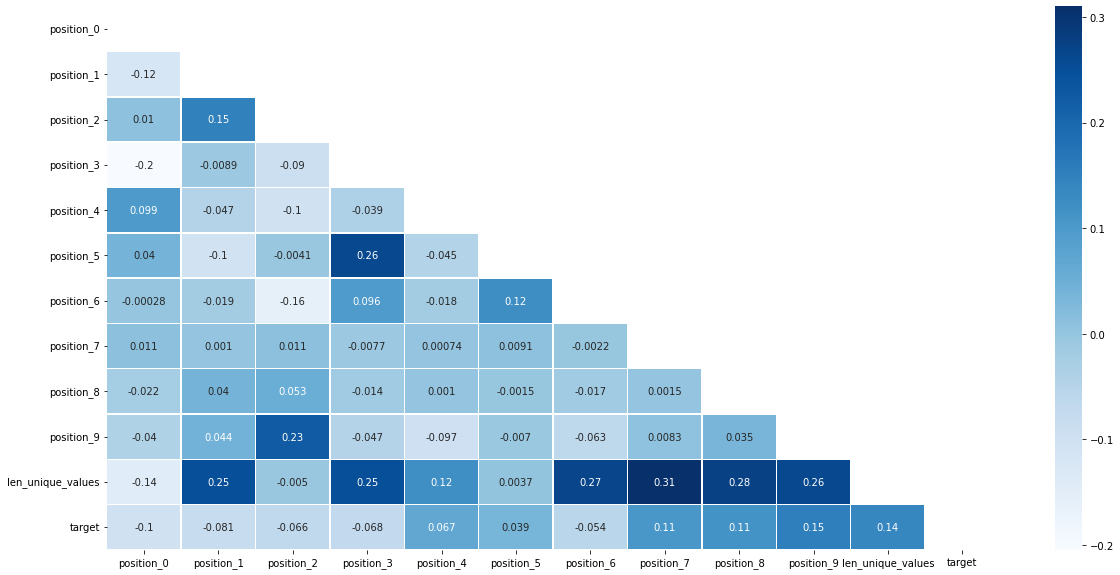

In [ ]:
#Let's look for new correlation with our newest choices
# Checking for the correlation between eachother by using heatmap
cat_variables = pd.concat([train.loc[:,cat_features],train[["target"]]],axis=1)
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(cat_variables.corr(), dtype = bool))
sns.heatmap(cat_variables.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)

## Interaction between variables

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
train = train.drop(columns="f_27",axis=1)

In [ ]:
from lightgbm import LGBMClassifier 

In [ ]:
X=train.drop(columns="target",axis=1)
y=train["target"]
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.4, random_state = 42)

# Train model
lgbm_model =LGBMClassifier(n_estimators = 5000, min_child_samples=80,random_state=1307)
lgbm_model.fit(X_train.values, y_train)
y_val_pred = lgbm_model.predict_proba(X_val.values)[:,1]
score = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC:{(score):.3f}")


Validation AUC:0.990


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4232857687707167033
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14546126706266595655
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
X_val.shape

(360000, 42)

In [ ]:
# Using a random sample of the dataframe for better time computation
X_sampled = X_val.sample(20000, random_state=1307)

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(X_sampled)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap_values

[array([[ 2.58308635e-02,  8.47074881e-01, -1.12164232e+00, ...,
          1.98229335e-01,  7.74774076e-02, -1.88216421e-02],
        [-6.34788888e-04,  9.03053421e-02,  2.12182173e-02, ...,
         -1.48032606e-02,  8.67157954e-03,  1.84794618e-02],
        [-8.54062413e-02,  7.21817131e-01, -1.24218983e-01, ...,
          5.71270750e-01,  7.57247783e-01,  8.66049468e-02],
        ...,
        [-9.08672016e-02,  1.58657510e-01, -5.75431275e-01, ...,
          8.05263564e-01,  9.88153135e-03,  5.04730453e-02],
        [-2.39681265e-02, -7.66636984e-02,  1.75550153e-01, ...,
         -2.50429563e-01,  4.80840093e-01,  3.77626202e-02],
        [ 1.45330512e-02, -5.98121014e-02, -4.83929431e-02, ...,
          8.91292823e-02, -8.24864529e-02,  6.35364999e-02]]),
 array([[-2.58308635e-02, -8.47074881e-01,  1.12164232e+00, ...,
         -1.98229335e-01, -7.74774076e-02,  1.88216421e-02],
        [ 6.34788888e-04, -9.03053421e-02, -2.12182173e-02, ...,
          1.48032606e-02, -8.67157954e

In [ ]:
shap_values_2 = shap_values[1][:,1::]

In [ ]:
shap_values_2.shape

(20000, 41)

In [ ]:
explainer.shap_interaction_values(X_sampled)

In [ ]:
loaded_arr = np.loadtxt('drive/MyDrive/Colab Notebooks/Kaggle_competition_may/shap_interaction_20k.txt')
load_original_arr = loaded_arr.reshape(
    #loaded_arr.shape[0], loaded_arr.shape[1] // shap_interaction.shape[2], shap_interaction.shape[2])
    loaded_arr.shape[0], loaded_arr.shape[1] // 41, 41)

shap_interaction = load_original_arr


In [ ]:
from matplotlib import gridspec

In [ ]:
X_sampled = X_sampled.drop(columns="id")

In [ ]:
X = X.drop(columns="id")

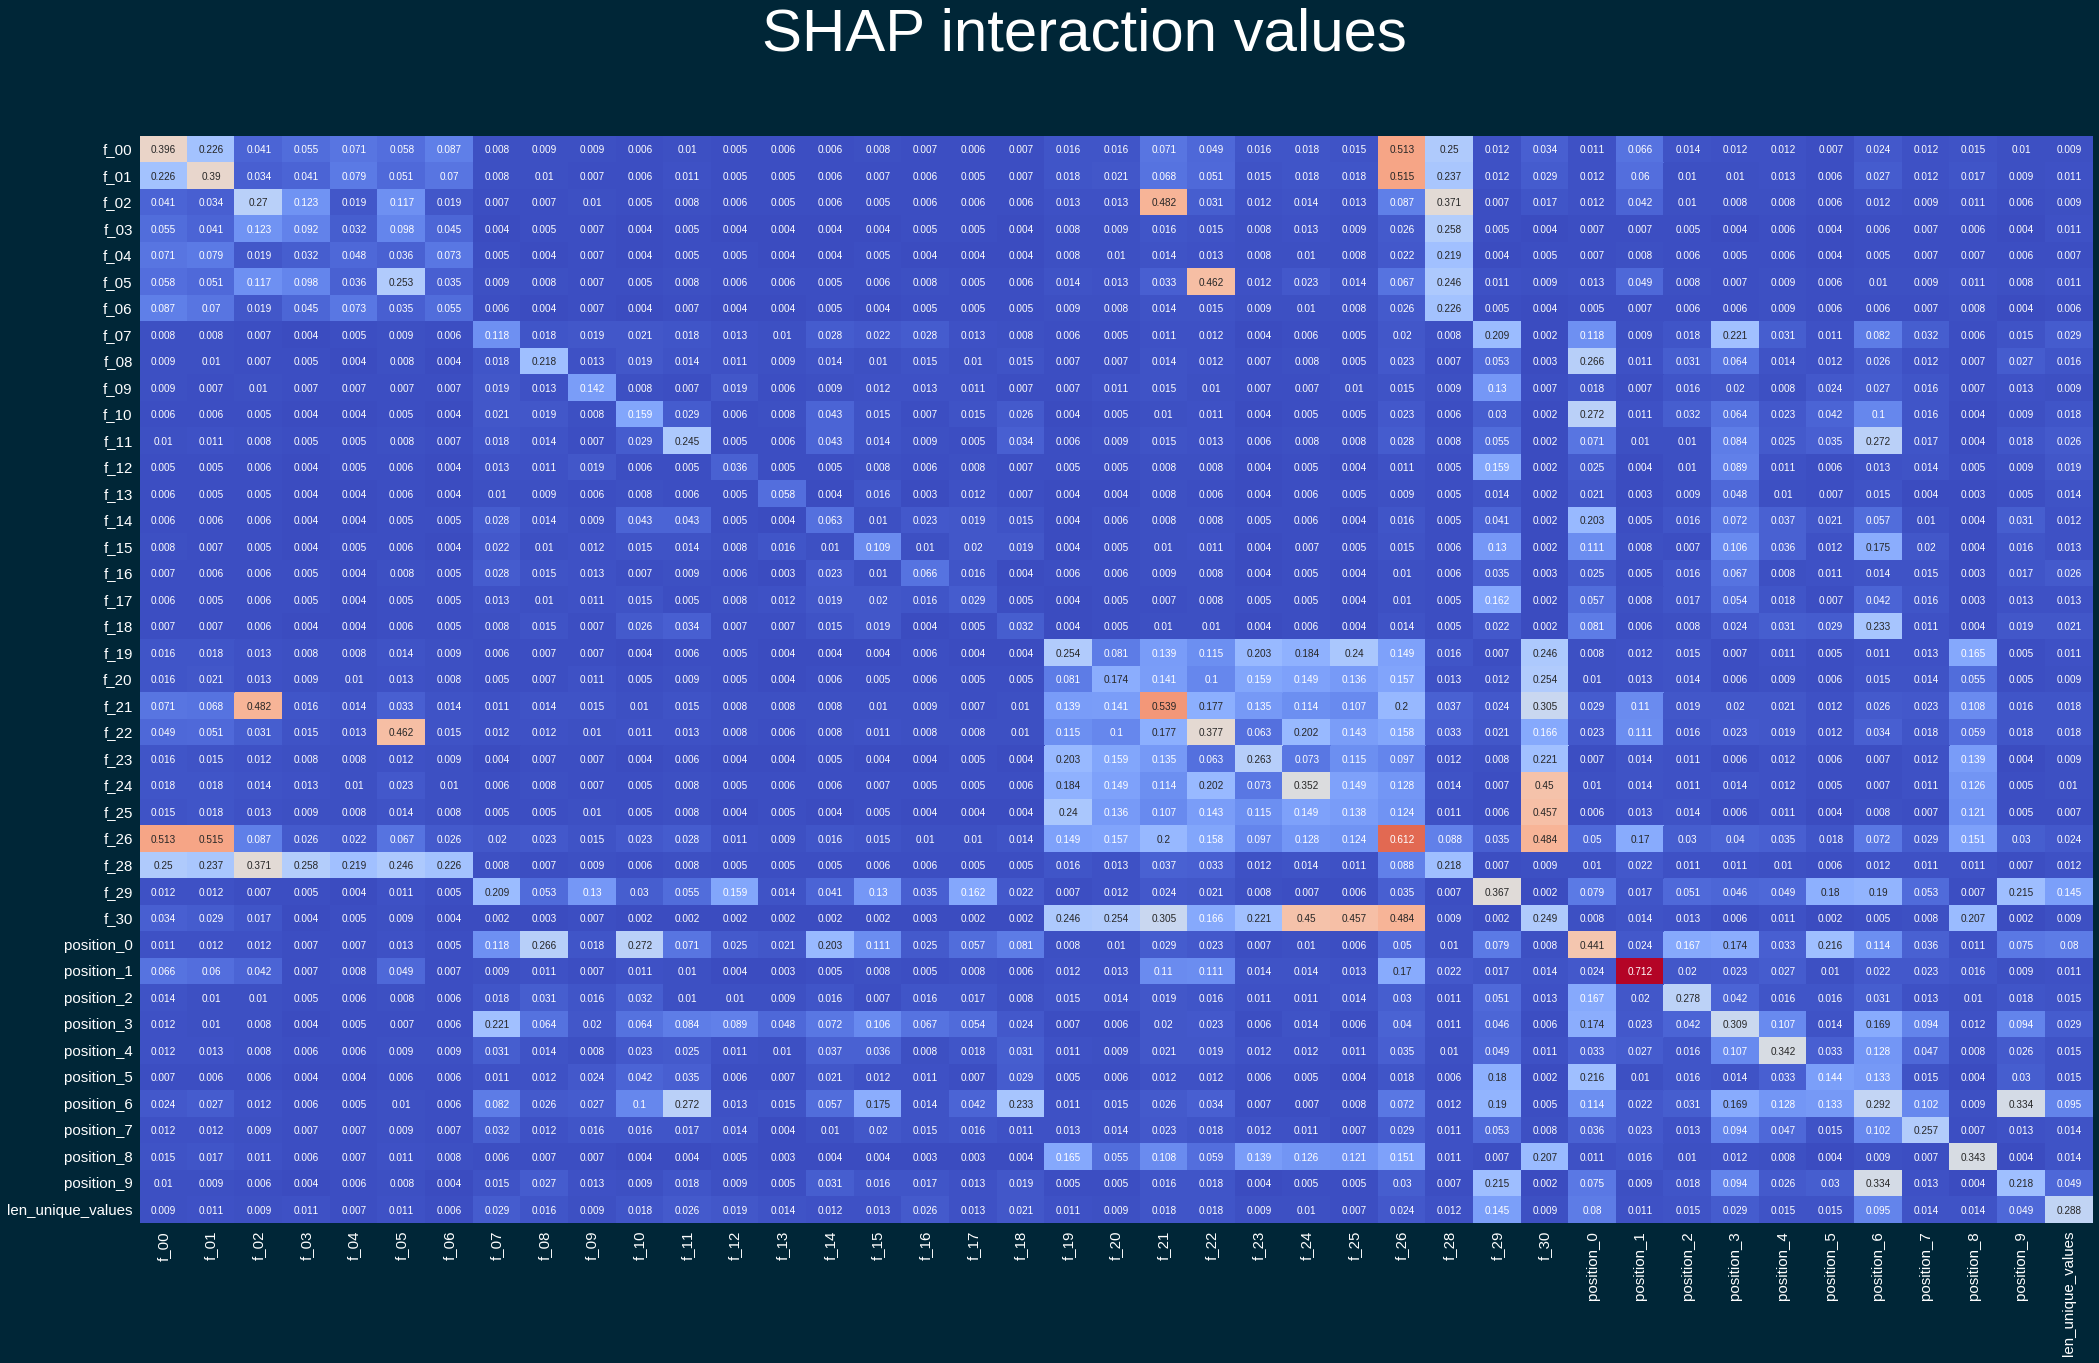

In [ ]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0) #global effect
df = pd.DataFrame(mean_shap, index=X.columns, columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2, inplace=True)

# display 
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df.round(decimals=3), cmap='coolwarm', annot=True, fmt='.6g', cbar=False, ax=ax, )
ax.tick_params(axis='x', colors='w', labelsize=15, rotation=90)
ax.tick_params(axis='y', colors='w', labelsize=15)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


From the shap interaction matrix we can grasp information about how features interact with each others. At a global level (which means considering the mean over all the samples), it seems like feature f_26 and f_30 (0.484), features f_00 and f_01 together with f_26 (0.515), feature f_05 and feature f_22 (0.462), and finally feature f_21 and f_02 (0.482) interact someway into conditioning final prediction of the model.

In [ ]:
from matplotlib import style

In [ ]:
pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mplcyberpunk

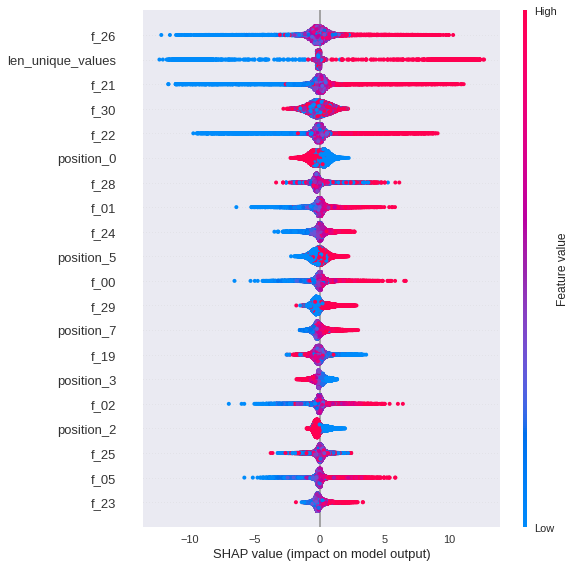

In [ ]:
# Summary statistics for all shapley value
plt.style.use("seaborn-dark")
shap.summary_plot(shap_values_2,X_sampled)



We can see how feature f_25 is not really impactful on the model. f_28 and f_30 too. Features f_26, len_unique_values, f_21, f_00, f_01, f_02, f_22 and f_05 seems to be really impactful. We could see their interations by looking at shapley interaction values or by scatter plotting them together. 

We can also look at some dependence plot, for example f_21 and f_02

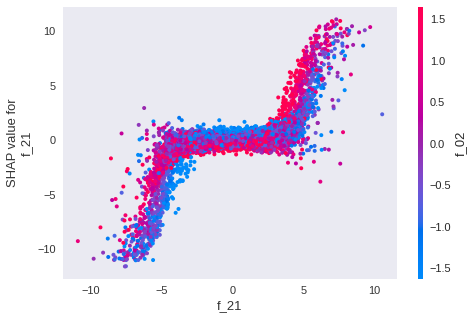

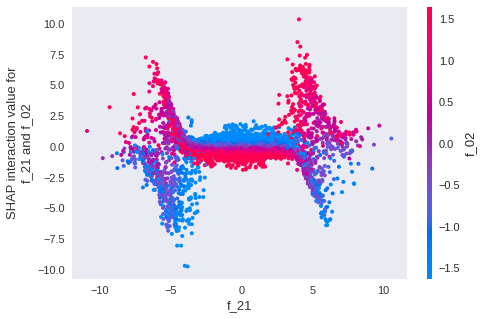

In [ ]:
 # make plot.
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    
ax0 =fig.add_subplot(spec[0,0])
shap.dependence_plot("f_21", shap_values_2, X_sampled, interaction_index="f_02")
ax1 = fig.add_subplot(spec[0, 1])
shap.dependence_plot(("f_21","f_02"), shap_interaction, X_sampled, interaction_index="f_02")

We can now look at an example of dependence plot for variables f_26 and f_30

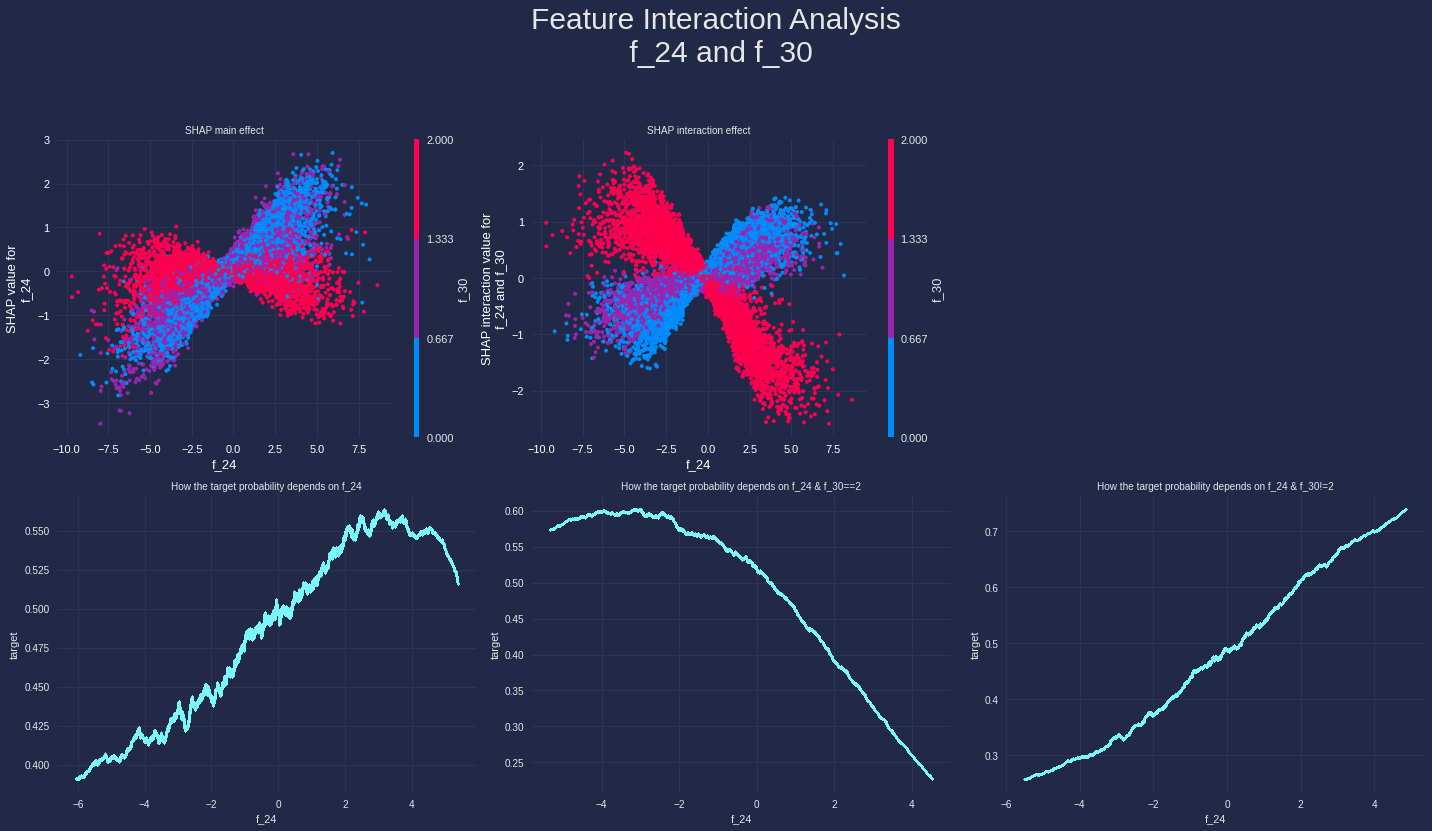

In [ ]:
#plot feature interaction
def plot_feature_interaction(f1, f2):
    # dependence plot
    fig = plt.figure(tight_layout=True, figsize=(20,10))
    spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
    
    


    ax0 = fig.add_subplot(spec[0, 0])
    minv, maxv = np.percentile(X_sampled, [1, 99])
    shap.dependence_plot(f1, shap_values_2, X_sampled, display_features=X_sampled, interaction_index=f2, ax=ax0, show=False)
    ax0.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax0.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax0.set_title(f'SHAP main effect', fontsize=10)

    ax1 = fig.add_subplot(spec[0, 1])
    shap.dependence_plot((f1, f2), shap_interaction, X_sampled, display_features=X_sampled, ax=ax1, axis_color='w', show=False)
    ax1.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax1.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax1.set_title(f'SHAP interaction effect', fontsize=10)


    temp = pd.DataFrame({f1: train[f1].values,
                    'target': train.target.values})
    temp = temp.sort_values(f1)
    temp.reset_index(inplace=True)
    
    ax3 = fig.add_subplot(spec[1, 0])
    sns.scatterplot(x=temp[f1], y=temp.target.rolling(15000, center=True).mean(), data=temp, ax=ax3, s=2)
    ax3.set_title('How the target probability depends on f_24', fontsize=10)

    temp = pd.DataFrame({f1: train.loc[train["f_30"]==2,f1].values,
                    'target': train.loc[train["f_30"]==2,'target'].values})
    temp = temp.sort_values(f1)
    temp.reset_index(inplace=True)
    
    ax4 = fig.add_subplot(spec[1, 1])
    sns.scatterplot(x=temp[f1], y=temp.target.rolling(15000, center=True).mean(), data=temp, ax=ax4, s=2)
    ax4.set_title('How the target probability depends on f_24 & f_30==2', fontsize=10)


    temp = pd.DataFrame({f1: train.loc[train["f_30"]!=2,f1].values,
                    'target': train.loc[train["f_30"]!=2,'target'].values})
    temp = temp.sort_values(f1)
    temp.reset_index(inplace=True)
    
    ax5 = fig.add_subplot(spec[1, 2])
    sns.scatterplot(x=temp[f1], y=temp.target.rolling(15000, center=True).mean(), data=temp, ax=ax5, s=2)
    ax5.set_title('How the target probability depends on f_24 & f_30!=2', fontsize=10)
    
    plt.suptitle("Feature Interaction Analysis\n f_24 and f_30", fontsize=30, y=1.15)
    fig.tight_layout()

    
    plt.show()

plt.style.use("cyberpunk")
f1='f_24'
f2='f_30'
plot_feature_interaction(f1, f2)

In the second plot we can see how shapley value (which is higher when a variable has much effect on the prediction output of the model) is larger when both features interact and get larger.

First plot shows the shapley values when variables are considered independent (f_24 feature here is the observed variable while f_30 is the random variable). The separation here is not optimal since these features should be considered interacting.

Other three plots show how varying feature f_24 variable has an effect on the predicted outcome of the model, when considering f_24, f_24 where f_30 is in state 2 and f_24 where f_30 is not in state 2.

findfont: Font family ['smallcaps'] not found. Falling back to DejaVu Sans.


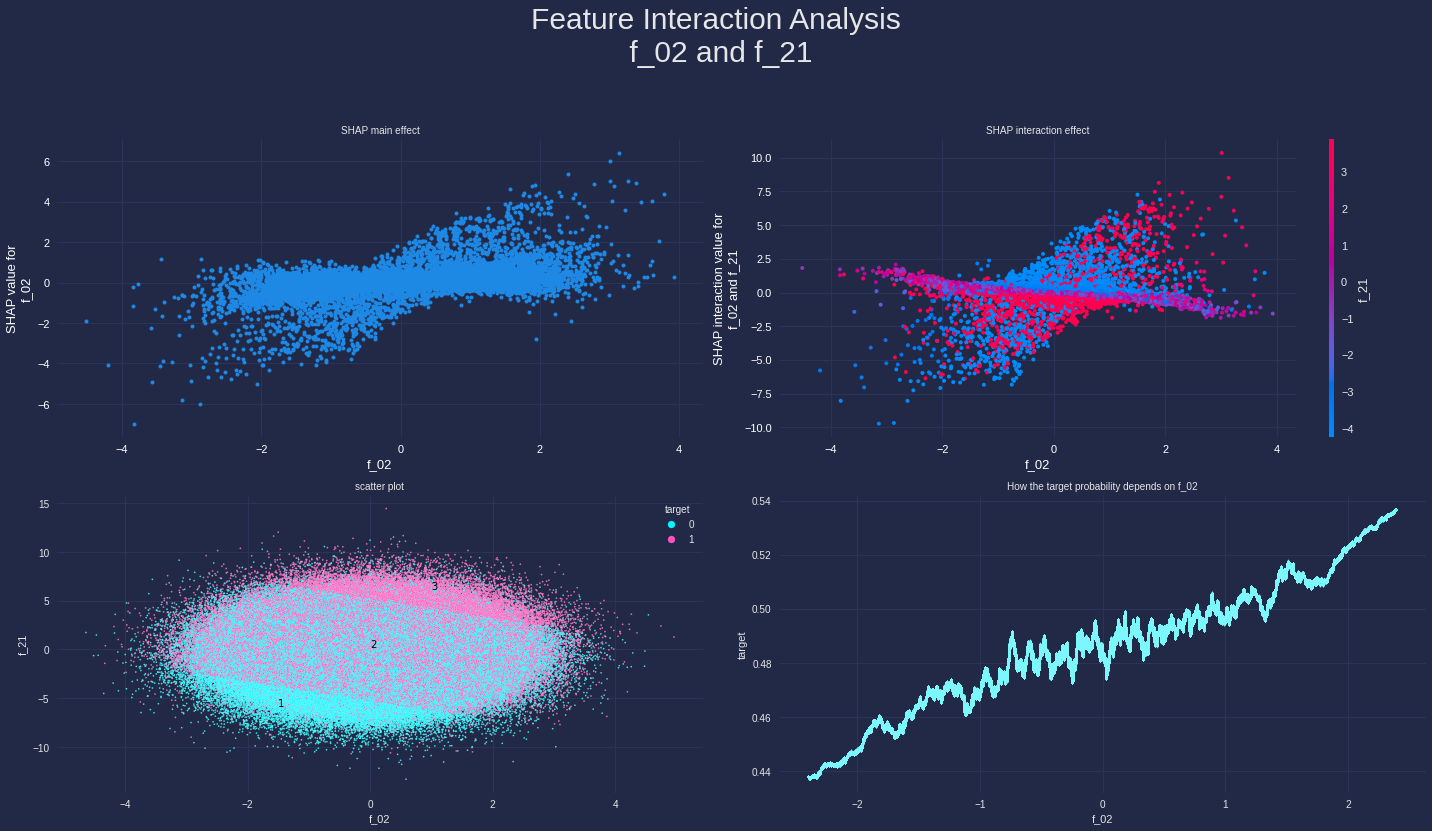

In [ ]:
#plot function
plt.style.use("cyberpunk")

def plot_feature_interaction(f1, f2):
    # dependence plot
    fig = plt.figure(tight_layout=True, figsize=(20,10))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)


    ax0 = fig.add_subplot(spec[0, 0])
    shap.dependence_plot(f1, shap_values_2, X_sampled, display_features=X_sampled, interaction_index=None, ax=ax0, show=False)
    ax0.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax0.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax0.set_title(f'SHAP main effect', fontsize=10)

    ax1 = fig.add_subplot(spec[0, 1])
    shap.dependence_plot((f1, f2), shap_interaction, X_sampled, display_features=X_sampled, ax=ax1, axis_color='w', show=False)
    ax1.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax1.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax1.set_title(f'SHAP interaction effect', fontsize=10)

    ax2 = fig.add_subplot(spec[1, 0])
    sns.scatterplot(x=f1, y=f2, data=train, hue="target", ax=ax2, s=2)
    ax2.text(-1.5, -5, "1", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")
    ax2.text(0, 1, "2", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")
    ax2.text(1, 7, "3", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")

    ax2.set_title(f'scatter plot', fontsize=10)

    temp = pd.DataFrame({f1: train[f1].values,'target': train.target.values})
    temp = temp.sort_values(f1)
    temp.reset_index(inplace=True)
    
    ax3 = fig.add_subplot(spec[1, 1])
    sns.scatterplot(x=temp[f1], y=temp.target.rolling(15000, center=True).mean(), data=temp, ax=ax3, s=2)
    ax3.set_title('How the target probability depends on f_02', fontsize=10)
    
    plt.suptitle("Feature Interaction Analysis\n f_02 and f_21", fontsize=30, y=1.15)
    plt.show()

f1='f_02'
f2='f_21'
plot_feature_interaction(f1, f2)

The third plot is really interesting, since it shows how f_21 and f_02 which didn't show correlation, show really deep interaction. When f_21 and f_02 increase, state machine is more likely to be 1, while when decreasing is more likely to be 0

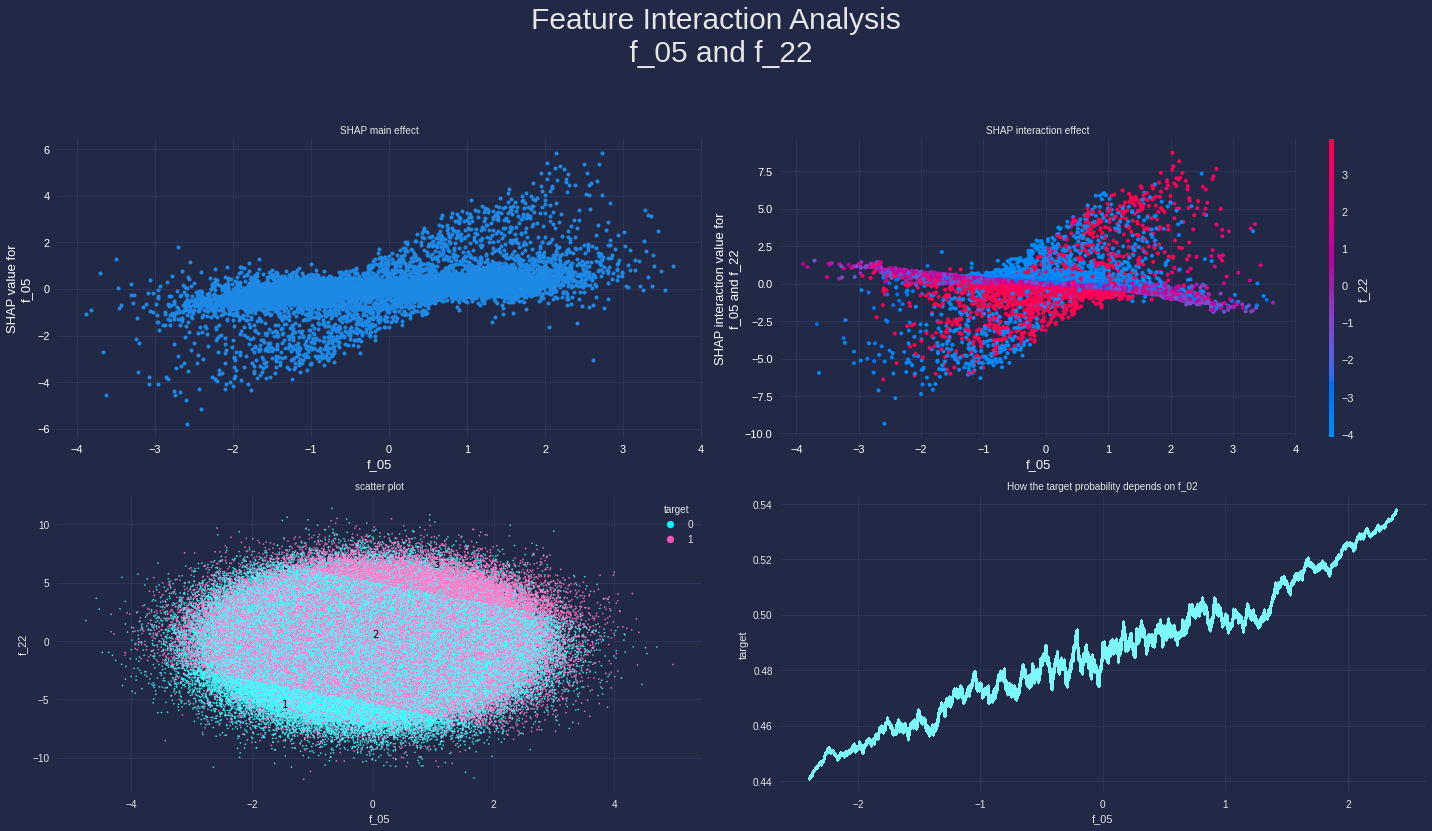

In [ ]:
#plot function
plt.style.use("cyberpunk")

def plot_feature_interaction(f1, f2):
    # dependence plot
    fig = plt.figure(tight_layout=True, figsize=(20,10))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)


    ax0 = fig.add_subplot(spec[0, 0])
    shap.dependence_plot(f1, shap_values_2, X_sampled, display_features=X_sampled, interaction_index=None, ax=ax0, show=False)
    ax0.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax0.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax0.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax0.set_title(f'SHAP main effect', fontsize=10)

    ax1 = fig.add_subplot(spec[0, 1])
    shap.dependence_plot((f1, f2), shap_interaction, X_sampled, display_features=X_sampled, ax=ax1, axis_color='w', show=False)
    ax1.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.xaxis.label.set_color('white')          #setting up Y-axis label color to blue
    ax1.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax1.tick_params(axis='y', colors='white')    #setting up X-axis tick color to red
    ax1.set_title(f'SHAP interaction effect', fontsize=10)

    ax2 = fig.add_subplot(spec[1, 0])
    sns.scatterplot(x=f1, y=f2, data=train, hue="target", ax=ax2, s=2)
    ax2.text(-1.5, -5, "1", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")
    ax2.text(0, 1, "2", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")
    ax2.text(1, 7, "3", fontsize=18, verticalalignment='top', rotation="horizontal", color="k", fontproperties="smallcaps")

    ax2.set_title(f'scatter plot', fontsize=10)

    temp = pd.DataFrame({f1: train[f1].values,'target': train.target.values})
    temp = temp.sort_values(f1)
    temp.reset_index(inplace=True)
    
    ax3 = fig.add_subplot(spec[1, 1])
    sns.scatterplot(x=temp[f1], y=temp.target.rolling(15000, center=True).mean(), data=temp, ax=ax3, s=2)
    ax3.set_title('How the target probability depends on f_02', fontsize=10)
    
    plt.suptitle("Feature Interaction Analysis\n f_05 and f_22", fontsize=30, y=1.15)
    plt.show()

f1='f_05'
f2='f_22'
plot_feature_interaction(f1, f2)

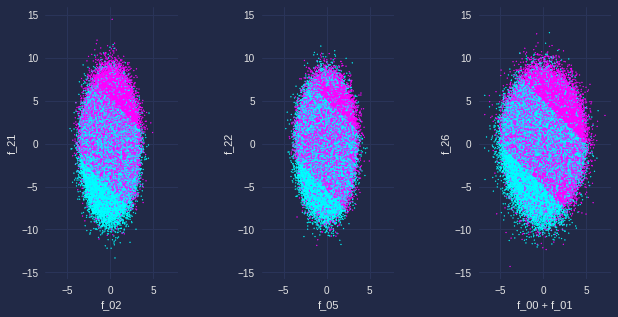

In [ ]:
# Let's look for scatter plots'
plt.figure(figsize=(11, 5))
# target == 0 → yellow; target == 1 → blue

ax = plt.subplot(1, 3, 1)
ax.scatter(train['f_02'], train['f_21'], s=1,
           c=train.target)
ax.set_xlabel('f_02')
ax.set_ylabel('f_21')
ax.set_aspect('equal')
ax0 = ax

ax = plt.subplot(1, 3, 2, sharex=ax0, sharey=ax0)
ax.scatter(train['f_05'], train['f_22'], s=1,
           c=train.target)
ax.set_xlabel('f_05')
ax.set_ylabel('f_22')
ax.set_aspect('equal')

ax = plt.subplot(1, 3, 3, sharex=ax0, sharey=ax0)
ax.scatter(train['f_00'] + train['f_01'], train['f_26'], s=1,
           c=train.target)
ax.set_xlabel('f_00 + f_01')
ax.set_ylabel('f_26')
ax.set_aspect('equal')

plt.show()

We can see how these three variables combinations seem really similar and describe three different areas. We could exploit this difference to engineerize these features.

In order to find best threshold for engineerize these features we could exploit WOE and IV (weights of explaination and information value)

In [ ]:
def WOE_based_IV(df,target,cont_var, limits):
    woe_df=pd.DataFrame()
    bins_list=list()
    event_list=list()
    non_event_list=list()
    for i in range(1,len(limits)):
        even_count=np.nansum(df[(limits[i-1]<df[cont_var])&(df[cont_var]<=limits[i])][target]>0)
        non_even_count=np.nansum(df[(limits[i-1]<df[cont_var])&(df[cont_var]<=limits[i])][target]<1)
        event_list.append(even_count)
        non_event_list.append(non_even_count)
        bins_list.append("lower: "+str(limits[i-1])+" - upper: "+str(limits[i]))
        
    woe_df=pd.DataFrame({
        "bin":bins_list,
        "No_events":event_list,
        "No_nonevents":non_event_list
    })
    woe_df["event_pct"]=woe_df["No_events"]/sum(woe_df["No_events"])
    woe_df["nonevent_pct"]=woe_df["No_nonevents"]/sum(woe_df["No_nonevents"])
    woe_df["WOE"]=np.log(woe_df["event_pct"]/woe_df["nonevent_pct"])
    woe_df["IV"]=(woe_df["event_pct"]-woe_df["nonevent_pct"])*woe_df["WOE"]
    return woe_df


In [ ]:
train["f_00_f_01_p"] = train["f_00"] + train["f_01"]

(array([3.00000e+01, 4.33000e+02, 3.01600e+03, 1.72630e+04, 6.36230e+04,
        1.53526e+05, 2.33450e+05, 2.24899e+05, 1.36340e+05, 5.17530e+04,
        1.30710e+04, 2.26100e+03, 3.09000e+02, 2.50000e+01, 1.00000e+00]),
 array([-1.28700709e+01, -1.10308658e+01, -9.19166073e+00, -7.35245565e+00,
        -5.51325058e+00, -3.67404550e+00, -1.83484043e+00,  4.36464623e-03,
         1.84356972e+00,  3.68277480e+00,  5.52197987e+00,  7.36118494e+00,
         9.20039002e+00,  1.10395951e+01,  1.28788002e+01,  1.47180052e+01]),
 <a list of 15 Patch objects>)

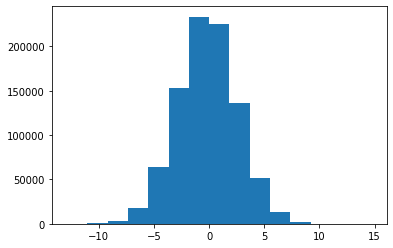

In [ ]:
plt.hist(train["f_21_f_02_p"],bins=15)

In [ ]:
train["f_21_f_02_p"]=1.0*train["f_21"]+1.0*train["f_02"]
train["f_22_f_05_p"]=1.0*train["f_22"]+1.0*train["f_05"]
train["f_00_f_01_p_f26_p"]=1.0*train["f_00_f_01_p"]+1.0*train["f_26"]



# I try to determine the first optimal cut...
optimal_cut_l=pd.DataFrame()
for i in np.arange(-12,-3,0.1):
    #print(i)
    woe_table=WOE_based_IV(train,target="target",cont_var="f_22_f_05_p", limits=[-100,i,5.2,100])
    optimal_cut_l=optimal_cut_l.append(pd.DataFrame({
        "value":[i],
        "WOE":[woe_table.head(1)["WOE"][0]]
    }))


optimal_cut_u=pd.DataFrame()
for i in np.arange(3,12,0.1):
    #print(i)
    woe_table=WOE_based_IV(train,target="target",cont_var="f_22_f_05_p", limits=[-100,-5.3,i,100])
    optimal_cut_u=optimal_cut_u.append(pd.DataFrame({
        "value":[i],
        "WOE":[woe_table.tail(1)["WOE"][2]]
    }))

divide by zero encountered in log


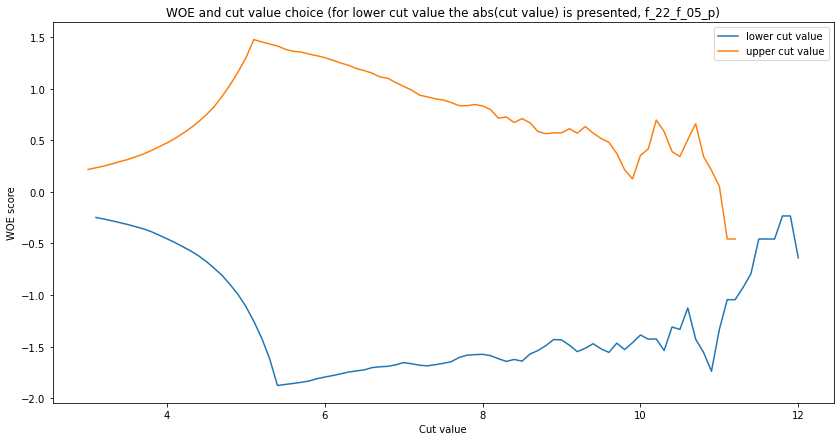

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(abs(optimal_cut_l["value"]),optimal_cut_l["WOE"],label="lower cut value")
plt.plot(optimal_cut_u["value"],optimal_cut_u["WOE"],label="upper cut value")
plt.legend()
plt.xlabel("Cut value")
plt.ylabel("WOE score")
plt.title("WOE and cut value choice (for lower cut value the abs(cut value) is presented, f_22_f_05_p)");

In [ ]:
max_WOE_p_22_05 = optimal_cut_u["WOE"].max()
min_WOE_p_22_05 = optimal_cut_l["WOE"].min()

In [ ]:
upper_bound_p_22_05 = optimal_cut_u.loc[optimal_cut_u["WOE"]==max_WOE_p_22_05,"value"]
lower_bound_p_22_05 =  optimal_cut_l.loc[optimal_cut_l["WOE"]==min_WOE_p_22_05,"value"]
print(upper_bound_p_22_05)
print(lower_bound_p_22_05)

0    5.1
Name: value, dtype: float64
0   -5.4
Name: value, dtype: float64


In [ ]:
# Same goes for other variables
optimal_cut_l_2=pd.DataFrame()
for i in np.arange(-12,-3,0.1):
    #print(i)
    woe_table=WOE_based_IV(train,target="target",cont_var="f_21_f_02_p", limits=[-100,i,5.2,100])
    optimal_cut_l_2=optimal_cut_l_2.append(pd.DataFrame({
        "value":[i],
        "WOE":[woe_table.head(1)["WOE"][0]]
    }))


optimal_cut_u_2=pd.DataFrame()
for i in np.arange(3,12,0.1):
    #print(i)
    woe_table=WOE_based_IV(train,target="target",cont_var="f_21_f_02_p", limits=[-100,-5.3,i,100])
    optimal_cut_u_2=optimal_cut_u_2.append(pd.DataFrame({
        "value":[i],
        "WOE":[woe_table.tail(1)["WOE"][2]]
    }))

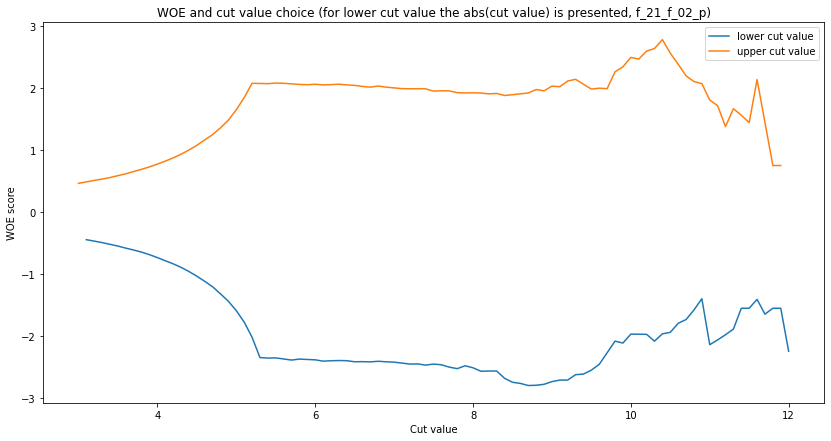

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(abs(optimal_cut_l["value"]),optimal_cut_l["WOE"],label="lower cut value")
plt.plot(optimal_cut_u["value"],optimal_cut_u["WOE"],label="upper cut value")
plt.legend()
plt.xlabel("Cut value")
plt.ylabel("WOE score")
plt.title("WOE and cut value choice (for lower cut value the abs(cut value) is presented, f_21_f_02_p)");

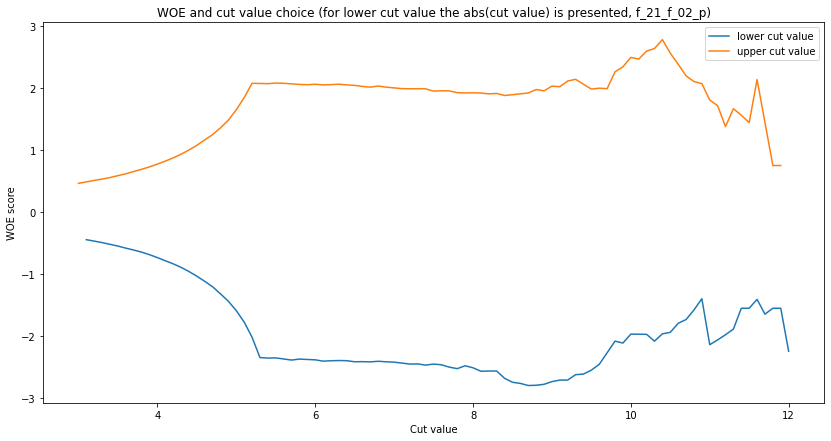

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(abs(optimal_cut_l_2["value"]),optimal_cut_l_2["WOE"],label="lower cut value")
plt.plot(optimal_cut_u_2["value"],optimal_cut_u_2["WOE"],label="upper cut value")
plt.legend()
plt.xlabel("Cut value")
plt.ylabel("WOE score")
plt.title("WOE and cut value choice (for lower cut value the abs(cut value) is presented, f_21_f_02_p)");

While it is true that WOE score is higher for larger cut values, this happens because of the density of occurencies and not for the presence of a real discriminatory threshold

In [ ]:
reduced_tab_u = optimal_cut_u_2.loc[optimal_cut_u_2["value"]<5.8,:]
reduced_tab_l = optimal_cut_l_2.loc[abs(optimal_cut_l_2["value"])<5.8,:]

In [ ]:
reduced_tab_u

,value,WOE
0,3.0,0.459299
0,3.1,0.482742
0,3.2,0.506330
0,3.3,0.528818
0,3.4,0.553010
0,3.5,0.583345
0,3.6,0.613788
0,3.7,0.650486
0,3.8,0.685914
0,3.9,0.724908


In [ ]:
reduced_tab_l

,value,WOE
0,-5.7,-2.391286
0,-5.6,-2.373554
0,-5.5,-2.356128
0,-5.4,-2.359022
0,-5.3,-2.350829
0,-5.2,-2.022469
0,-5.1,-1.777956
0,-5.0,-1.594184
0,-4.9,-1.442524
0,-4.8,-1.323481


We could have considered the IV for deciding, however as threshold we could consider 5.3 for upper and -5.2 for lower

We can repeat same procedure for the last engineerized feature